In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
import datetime as dt
sns.set(rc = {'figure.figsize': (15, 8)})
import datetime as dt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
df = pd.read_csv('fraudTrain.csv')

In [33]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [34]:
df.drop_duplicates(inplace = True)

# Exploratory Data Analysis(EDA)

### 1. Transaction amout vs Fraud

In [35]:
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [36]:
np.percentile(df['amt'], 99)

545.9926000000002

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

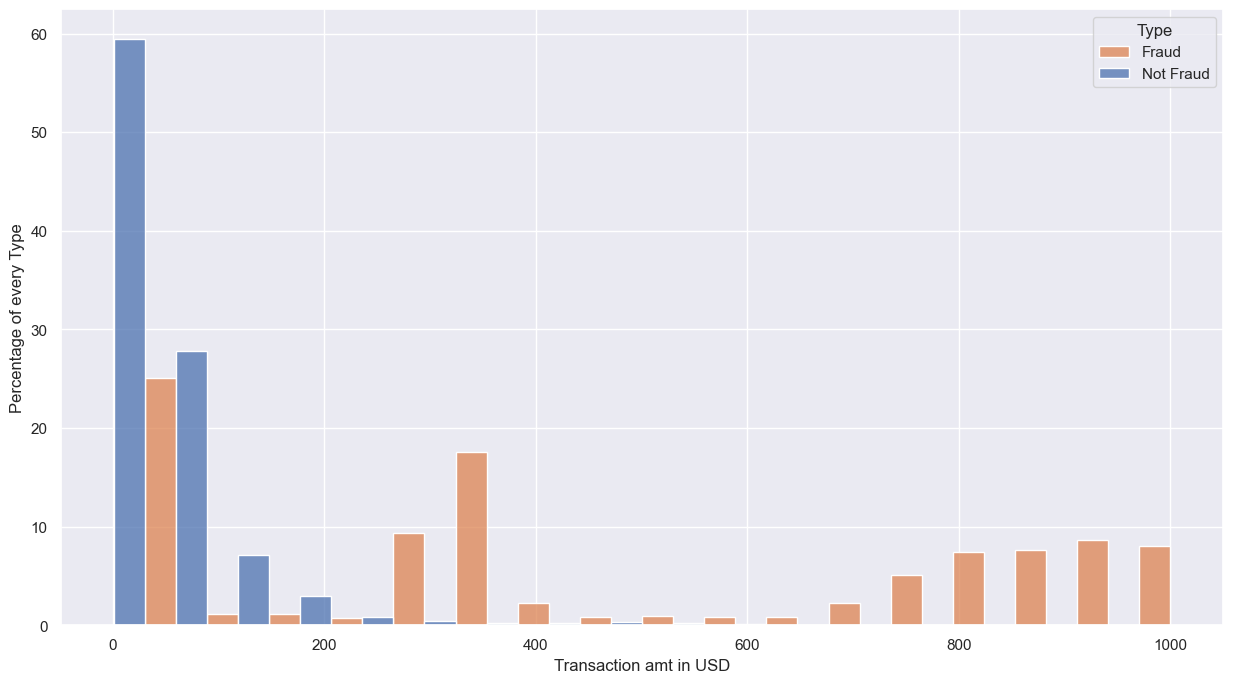

In [37]:
ax = sns.histplot(x = 'amt', data = df[df.amt <= 1000], hue = 'is_fraud', stat = 'percent', multiple = 'dodge', common_norm = False, bins = 17)
ax.set_ylabel('Percentage of every Type')
ax.set_xlabel('Transaction amt in USD')
plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])

### 2. Age vs Fraud

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

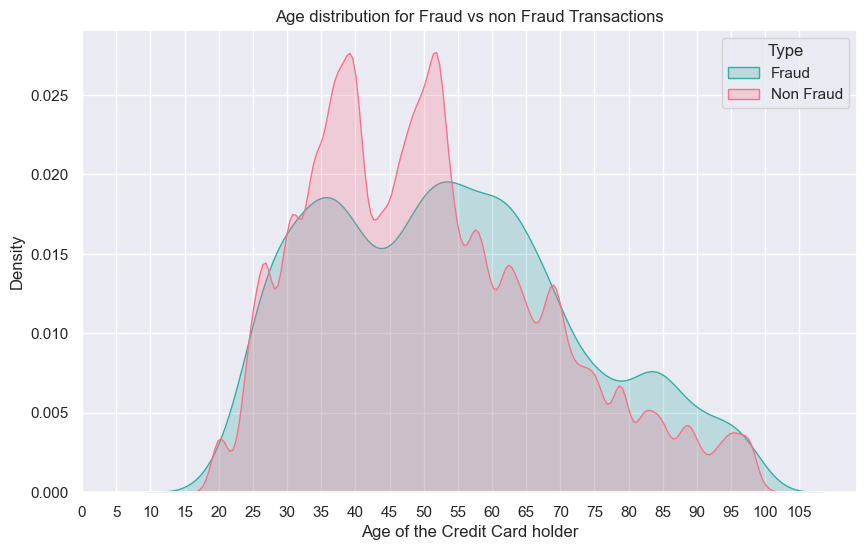

In [38]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = dt.date.today().year - df['dob'].dt.year

#Plotting
plt.figure(figsize = (10, 6))
ax = sns.kdeplot(x = 'age', data = df, hue = 'is_fraud', common_norm = False, fill = True, palette = 'husl')
ax.set_xlabel('Age of the Credit Card holder')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 5))
plt.title('Age distribution for Fraud vs non Fraud Transactions')
plt.legend(title = 'Type', labels = ['Fraud', 'Non Fraud'])

### 3. Gender vs Fraud

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

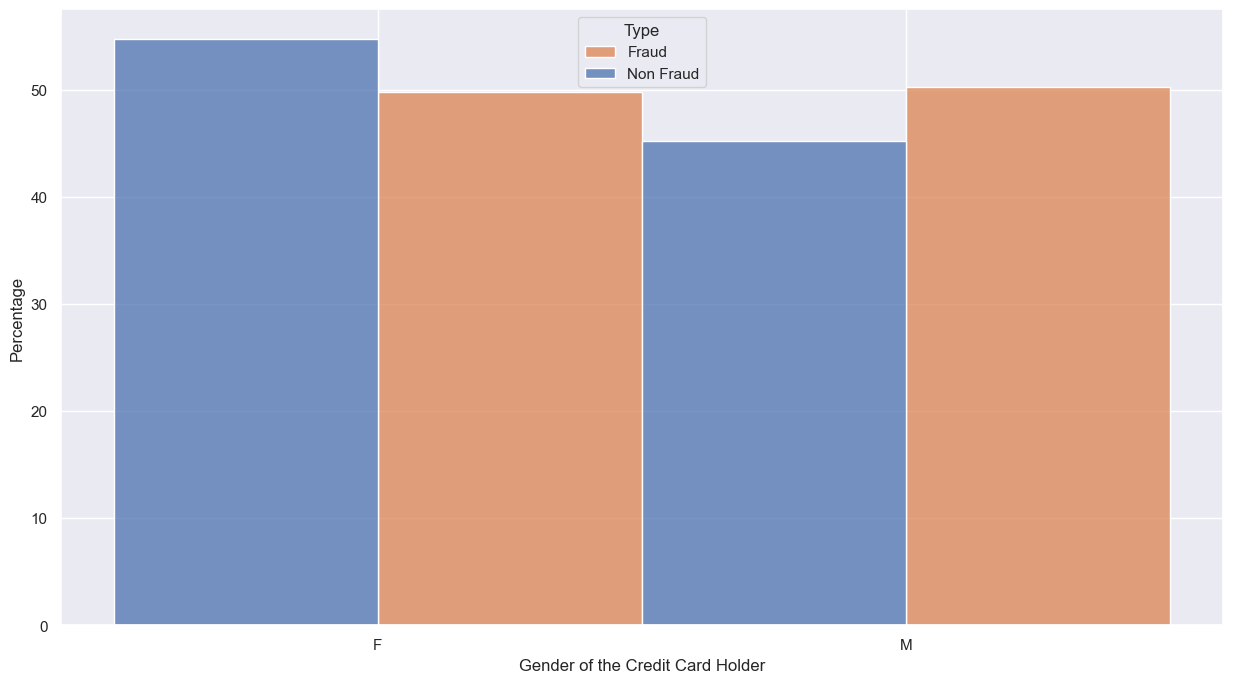

In [39]:
ax = sns.histplot(x = 'gender', data = df, stat = 'percent', hue = 'is_fraud', common_norm = False, multiple = 'dodge')
ax.set_xlabel('Gender of the Credit Card Holder')
ax.set_ylabel('Percentage')
plt.legend(title = 'Type', labels = ['Fraud', 'Non Fraud'])

### 4. Expenditure Category vs Fraud 

Text(0.5, 1.0, '% difference of fraud vs non fraud transaction for every category')

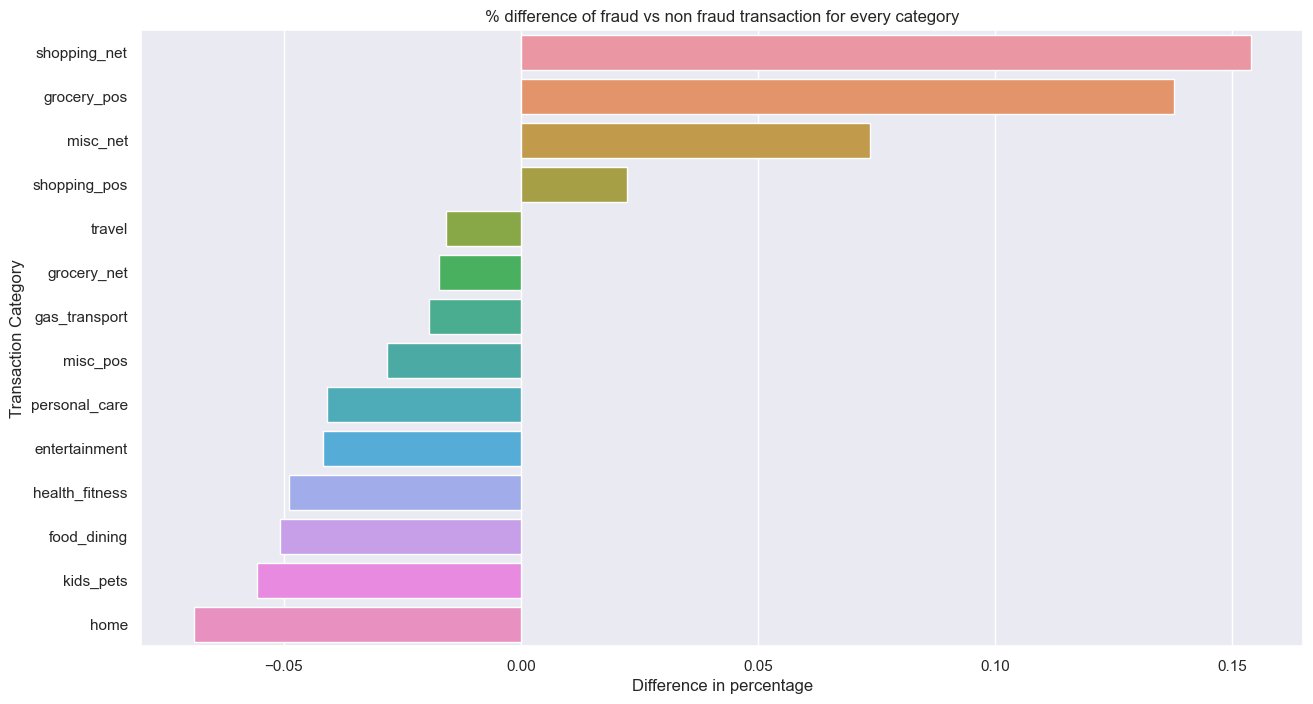

In [40]:
c1 = df[df['is_fraud'] == 0]['category'].value_counts(normalize = True).to_frame().reset_index()
c1.columns = ['category', 'non fraud percentage']
c2 = df[df['is_fraud'] == 1]['category'].value_counts(normalize = True).to_frame().reset_index()
c2.columns = ['category', 'fraud percentage']
c12 = c1.merge(c2, on = 'category')
c12['difference'] = c12['fraud percentage'] - c12['non fraud percentage']
ax = sns.barplot(y = 'category', x = 'difference', data = c12.sort_values('difference', ascending = False))
ax.set_xlabel('Difference in percentage')
ax.set_ylabel('Transaction Category')
plt.title("% difference of fraud vs non fraud transaction for every category")

### 5. Fraudulent Activity Trends

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

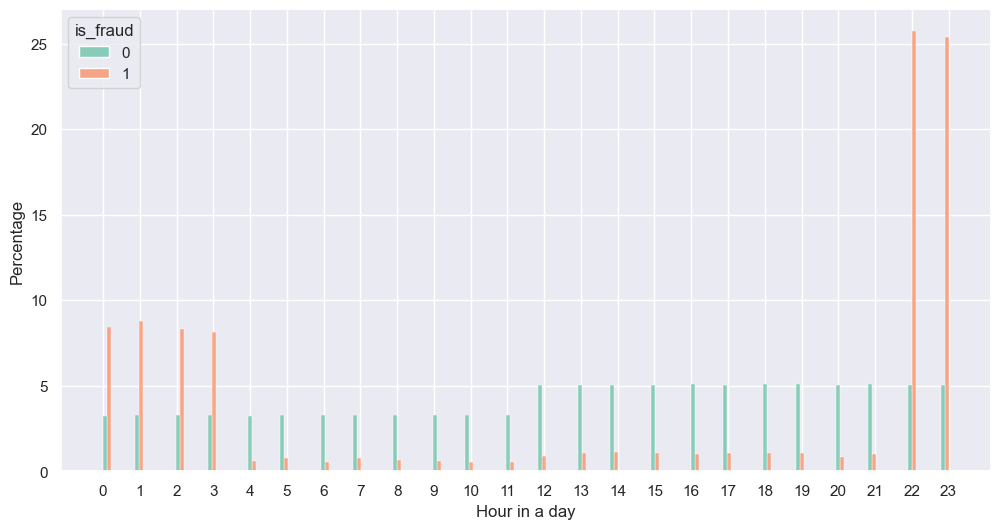

In [41]:
# Trends within an hour
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
plt.figure(figsize = (12, 6))
ax = sns.histplot(data = df, x = 'hour', hue = 'is_fraud', common_norm = False, stat = 'percent', multiple = 'dodge', palette = 'Set2')
ax.set_xlabel('Hour in a day')
ax.set_ylabel('Percentage')
plt.xticks(np.arange(0, 24, 1))
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

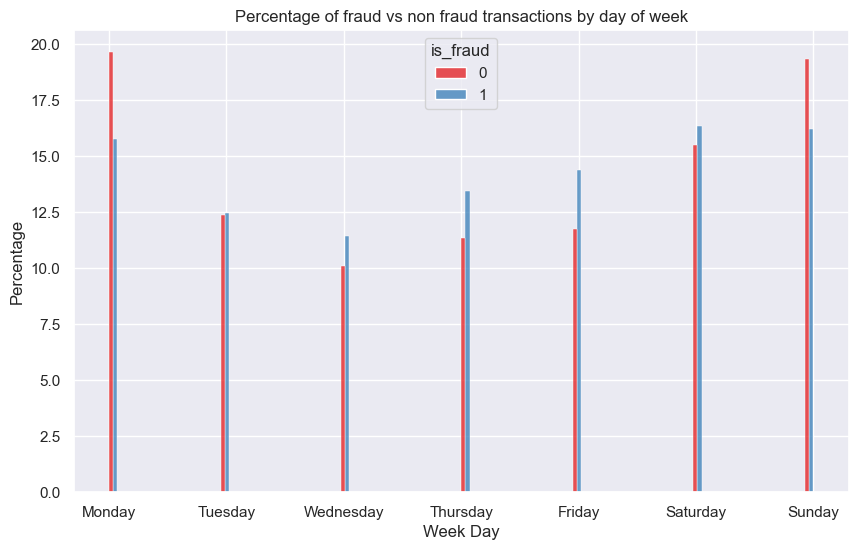

In [42]:
# Trends within a week
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['day'] = df['trans_date_trans_time'].dt.dayofweek
plt.figure(figsize = (10, 6))
ax = sns.histplot(data = df, x = 'day', hue = 'is_fraud', common_norm = False, stat = 'percent', multiple = 'dodge', palette = 'Set1')
ax.set_xticks(range(7))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xlabel('Week Day')
ax.set_ylabel('Percentage')
plt.title('Percentage of fraud vs non fraud transactions by day of week')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

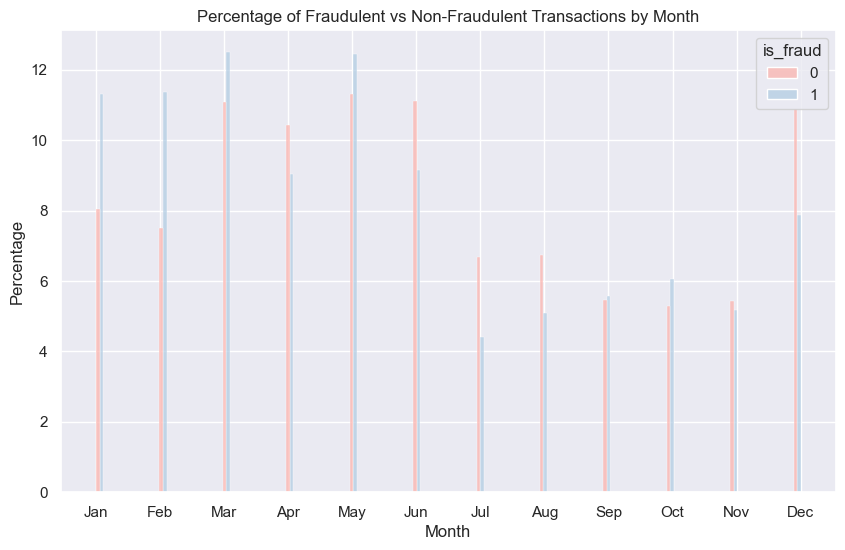

In [43]:
# Trends in a month
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['month'] = df['trans_date_trans_time'].dt.month
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge', palette='Pastel1')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1, 13, 1), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions by Month')
plt.show()

# Data Modeling and Prediction

In [44]:
# Training data Subset
train = df[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'is_fraud']]
train = pd.get_dummies(train, drop_first = True)
y_train = train['is_fraud'].values
X_train = train.drop('is_fraud', axis = 'columns').values
test = pd.read_csv('fraudTest.csv')
test['age'] = dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour'] = pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day'] = pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month'] = pd.to_datetime(test['trans_date_trans_time']).dt.month
test = test[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'is_fraud']]
test = pd.get_dummies(test, drop_first = True)
y_test = test['is_fraud'].values
X_test = test.drop('is_fraud', axis = 'columns').values

## We are using Random Forest Algorithm for this project

In [45]:
method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

C:\Users\Wednesday -__-\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[526442  27132]
 [   537   1608]]
Share of Non-Fraud in Test Data: 0.9961
